In [51]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter

import pandas as pd
import numpy as np #vektorler uzerinde islem yapmak icin

In [52]:
df1 = pd.read_csv("hashtags.csv")
df1

,text,reply,retweet,like,view,date
0,We care about the safety of your water. Contac...,0,0,0,0,1 saat önce
1,"3. Water for Climate, Resilience and Environme...",0,0,0,108,1 saat önce
2,\r\n@bbc5live \r\n\r\nit cannot be right that...,0,0,0,8,1 saat önce
3,@bbc5live \r\n\r\nit's time to scrap the stand...,0,0,0,3,1 saat önce
4,#WaterSecurity | Managing Coastal Aquifers pro...,0,3,3,108,1 saat önce
...,...,...,...,...,...,...
2740,Today is #WorldWaterDay! Check out these #Wate...,0,2,5,168,22 Mar
2741,Celebrating #WorldWaterDay -everyday at Blueca...,0,0,1,40,22 Mar
2742,"World Water Day, 2023\r\n#jaljeevanmission\r\n...",0,0,1,42,22 Mar
2743,Water is very precious for life. We need to sa...,0,0,0,57,22 Mar


In [53]:
df2 = pd.read_csv("hashtags01012023-21032023.csv")
df2

,text,reply,retweet,like,view,date
0,Happy #FixALeakWeek! The Water Division is giv...,0,0,2,272,21 Mar
1,"This morning, SCOTUS heard oral arguments in A...",0,0,0,77,21 Mar
2,"EPA finally proposes a strict limit on PFAS, o...",0,0,1,35,21 Mar
3,The end of times due to a low water supply ma...,1,0,3,68,21 Mar
4,But it's not too late. We must act now to add...,1,0,2,59,21 Mar
...,...,...,...,...,...,...
4014,These kids came together to protest the world'...,0,1,3,70,26 Oca
4015,"Patterned Green Roofs: Unique, Impactful, and ...",0,3,3,185,26 Oca
4016,Remote sensing gives USACE an edge at detectin...,0,0,0,12,26 Oca
4017,$OCLN OriginClear's Water On Demand Subsidiary...,0,1,1,27,26 Oca


In [54]:
data = df1.append(df2, ignore_index=True)
data

C:\Users\seda\AppData\Local\Temp\ipykernel_12032\976920043.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df1.append(df2, ignore_index=True)


,text,reply,retweet,like,view,date
0,We care about the safety of your water. Contac...,0,0,0,0,1 saat önce
1,"3. Water for Climate, Resilience and Environme...",0,0,0,108,1 saat önce
2,\r\n@bbc5live \r\n\r\nit cannot be right that...,0,0,0,8,1 saat önce
3,@bbc5live \r\n\r\nit's time to scrap the stand...,0,0,0,3,1 saat önce
4,#WaterSecurity | Managing Coastal Aquifers pro...,0,3,3,108,1 saat önce
...,...,...,...,...,...,...
6759,These kids came together to protest the world'...,0,1,3,70,26 Oca
6760,"Patterned Green Roofs: Unique, Impactful, and ...",0,3,3,185,26 Oca
6761,Remote sensing gives USACE an edge at detectin...,0,0,0,12,26 Oca
6762,$OCLN OriginClear's Water On Demand Subsidiary...,0,1,1,27,26 Oca


In [55]:
data.drop_duplicates(subset="text",
                     keep=False, inplace=True)

In [56]:
data

,text,reply,retweet,like,view,date
1,"3. Water for Climate, Resilience and Environme...",0,0,0,108,1 saat önce
2,\r\n@bbc5live \r\n\r\nit cannot be right that...,0,0,0,8,1 saat önce
3,@bbc5live \r\n\r\nit's time to scrap the stand...,0,0,0,3,1 saat önce
4,#WaterSecurity | Managing Coastal Aquifers pro...,0,3,3,108,1 saat önce
5,"Climate change intensifies, and rainfall patte...",0,1,1,19,1 saat önce
...,...,...,...,...,...,...
6757,"This month, @Nature launched a new online jour...",0,1,1,74,26 Oca
6758,.\r\n#Walking in urban green spaces is better ...,0,1,1,84,26 Oca
6759,These kids came together to protest the world'...,0,1,3,70,26 Oca
6760,"Patterned Green Roofs: Unique, Impactful, and ...",0,3,3,185,26 Oca


In [57]:
# WORD COUNT:
data['word_count'] = data['text'].apply(lambda x : len(str(x).split()))
data.head()

,text,reply,retweet,like,view,date,word_count
1,"3. Water for Climate, Resilience and Environme...",0,0,0,108,1 saat önce,30
2,\r\n@bbc5live \r\n\r\nit cannot be right that...,0,0,0,8,1 saat önce,21
3,@bbc5live \r\n\r\nit's time to scrap the stand...,0,0,0,3,1 saat önce,45
4,#WaterSecurity | Managing Coastal Aquifers pro...,0,3,3,108,1 saat önce,38
5,"Climate change intensifies, and rainfall patte...",0,1,1,19,1 saat önce,20


In [58]:
# CHARACTER COUNT:
data['char_count'] = data['text'].apply(lambda x : len(str(x)))
data.head()

,text,reply,retweet,like,view,date,word_count,char_count
1,"3. Water for Climate, Resilience and Environme...",0,0,0,108,1 saat önce,30,278
2,\r\n@bbc5live \r\n\r\nit cannot be right that...,0,0,0,8,1 saat önce,21,121
3,@bbc5live \r\n\r\nit's time to scrap the stand...,0,0,0,3,1 saat önce,45,263
4,#WaterSecurity | Managing Coastal Aquifers pro...,0,3,3,108,1 saat önce,38,280
5,"Climate change intensifies, and rainfall patte...",0,1,1,19,1 saat önce,20,181


In [59]:
# Count #HASHTAG and @MENTIONS:

data['#tag'] = data['text'].apply(lambda x : len([t for t in str(x).split() if t.startswith('#')]))
data['@'] = data['text'].apply(lambda x : len([t for t in str(x).split() if t.startswith('@')]))
data.head()

,text,reply,retweet,like,view,date,word_count,char_count,#tag,@
1,"3. Water for Climate, Resilience and Environme...",0,0,0,108,1 saat önce,30,278,15,0
2,\r\n@bbc5live \r\n\r\nit cannot be right that...,0,0,0,8,1 saat önce,21,121,1,1
3,@bbc5live \r\n\r\nit's time to scrap the stand...,0,0,0,3,1 saat önce,45,263,1,1
4,#WaterSecurity | Managing Coastal Aquifers pro...,0,3,3,108,1 saat önce,38,280,1,3
5,"Climate change intensifies, and rainfall patte...",0,1,1,19,1 saat önce,20,181,3,0


In [60]:
data['hastagh'] = data['text'].str.findall(r'#\w+')
data.head()

,text,reply,retweet,like,view,date,word_count,char_count,#tag,@,hastagh
1,"3. Water for Climate, Resilience and Environme...",0,0,0,108,1 saat önce,30,278,15,0,"[#vajiramandravi, #unwaterconference, #water, ..."
2,\r\n@bbc5live \r\n\r\nit cannot be right that...,0,0,0,8,1 saat önce,21,121,1,1,[#Savewater]
3,@bbc5live \r\n\r\nit's time to scrap the stand...,0,0,0,3,1 saat önce,45,263,1,1,[#Savewater]
4,#WaterSecurity | Managing Coastal Aquifers pro...,0,3,3,108,1 saat önce,38,280,1,3,[#WaterSecurity]
5,"Climate change intensifies, and rainfall patte...",0,1,1,19,1 saat önce,20,181,3,0,"[#TugwiMukosi, #Zimbabwe, #WaterSecurity]"


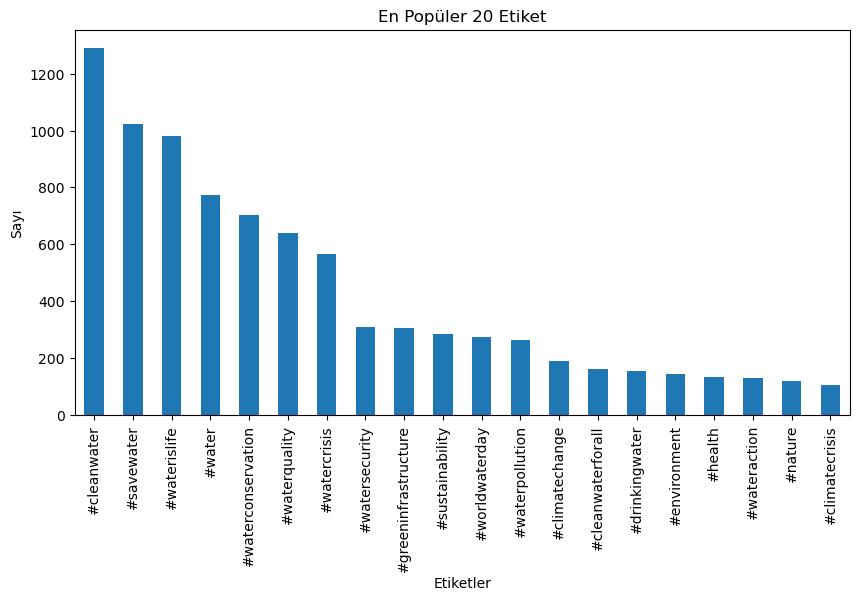

In [61]:
# Hastagh sütunundaki tüm etiketleri bir listeye topla
all_hashtags = []
for hashtags in data['hastagh']:
    all_hashtags.extend([tag.lower() for tag in hashtags])

# Etiketlerin toplam sayısını hesapla
tag_counts = pd.Series(all_hashtags).value_counts()

# Bar grafiği olarak göster
plt.figure(figsize=(10,5))
tag_counts[:20].plot(kind='bar')
plt.title('En Popüler 20 Etiket')
plt.xlabel('Etiketler')
plt.ylabel('Sayı')
plt.show()

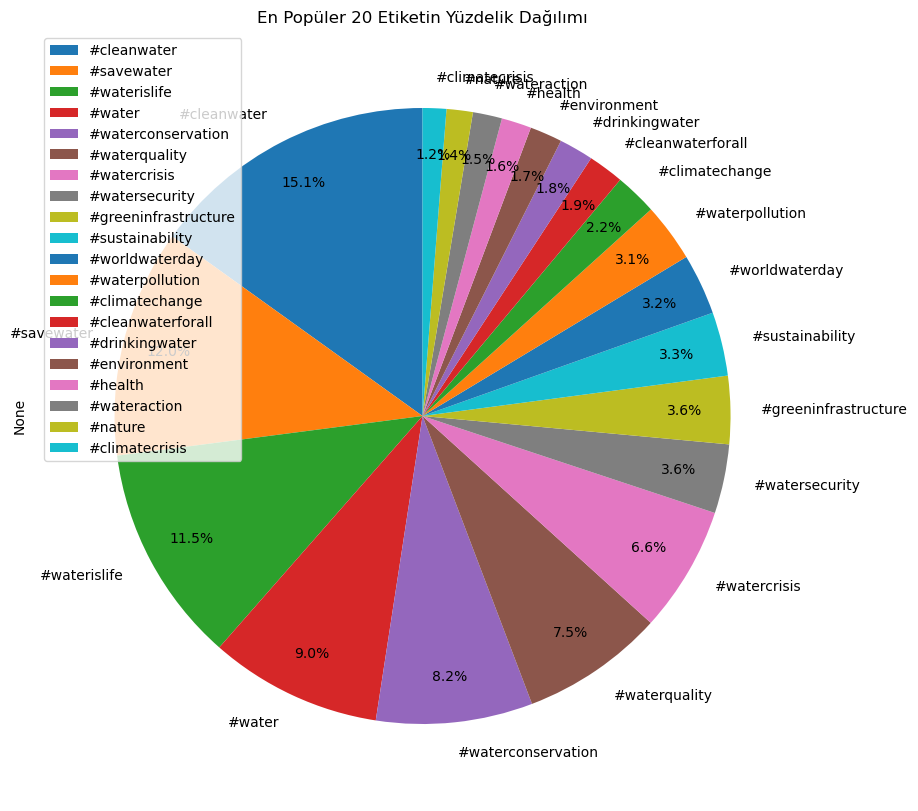

In [62]:
# Hastagh sütunundaki tüm etiketleri bir listeye topla
all_hashtags = []
for hashtags in data['hastagh']:
    all_hashtags.extend([tag.lower() for tag in hashtags])

# Etiketlerin toplam sayısını hesapla
tag_counts = pd.Series(all_hashtags).value_counts()

# Etiketlerin yüzdelik oranlarını hesapla
tag_percents = (tag_counts / tag_counts.sum()) * 100

# Dairesel grafik olarak göster
plt.figure(figsize=(10,10))
tag_percents[:20].plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('En Popüler 20 Etiketin Yüzdelik Dağılımı')
plt.legend(tag_percents.index[:20], loc='best')
plt.show()

In [63]:
# Convert to Lower Case : 
data['text'] = data['text'].apply(lambda x : str(x).lower())
data['text'].head(10)

1     3. water for climate, resilience and environme...
2     \r\n@bbc5live  \r\n\r\nit cannot be right that...
3     @bbc5live \r\n\r\nit's time to scrap the stand...
4     #watersecurity | managing coastal aquifers pro...
5     climate change intensifies, and rainfall patte...
6     the people in the 7 states across the southwes...
7     say goodbye to murky, polluted  water and hell...
8     at times when water has become a scarce resour...
9     water is life \r\n#rain #rechargewater #rechar...
10    "water is the essence of life and we must do e...
Name: text, dtype: object

In [64]:
# Contaction to Expansion > can't TO can not ,you'll TO you will
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [65]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [66]:
%%time
data['text'] = data['text'].apply(lambda x : cont_to_exp(x))
data.head(10)

Wall time: 571 ms


,text,reply,retweet,like,view,date,word_count,char_count,#tag,@,hastagh
1,"3. water for climate, resilience and environme...",0,0,0,108,1 saat önce,30,278,15,0,"[#vajiramandravi, #unwaterconference, #water, ..."
2,\r\n@bbc5live \r\n\r\nit cannot be right that...,0,0,0,8,1 saat önce,21,121,1,1,[#Savewater]
3,@bbc5live \r\n\r\nit has / it is time to scrap...,0,0,0,3,1 saat önce,45,263,1,1,[#Savewater]
4,#watersecurity | managing coastal aquifers pro...,0,3,3,108,1 saat önce,38,280,1,3,[#WaterSecurity]
5,"climate change intensifies, and rainfall patte...",0,1,1,19,1 saat önce,20,181,3,0,"[#TugwiMukosi, #Zimbabwe, #WaterSecurity]"
6,the people in the 7 states across the southwes...,0,0,0,7,2 saat önce,38,340,2,1,"[#WaterRights, #LimitedResource]"
7,"say goodbye to murky, polluted water and hell...",0,0,1,10,2 saat önce,30,278,9,0,"[#Thermax, #AcceleratingSustainabilityTogether..."
8,at times when water has become a scarce resour...,0,2,3,30,2 saat önce,37,280,7,0,"[#HaraHaiTohBharaHai, #GreenIndiaChallenge, #S..."
9,water is life \r\n#rain #rechargewater #rechar...,0,0,0,5,2 saat önce,22,278,19,0,"[#rain, #RechargeWater, #RechargeRain, #Water,..."
10,"""water is the essence of life and we must do e...",0,0,0,16,2 saat önce,40,262,2,1,"[#WaterConservation, #PaaniFoundation]"


In [67]:
# Remove multiple spaces 
data['text'] = data['text'].apply(lambda d : " ".join(d.split()))

In [68]:
# Remove HTML tags
from bs4 import BeautifulSoup

data['text'] = data['text'].apply(lambda x : BeautifulSoup(x, 'lxml').get_text())

C:\Users\seda\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [69]:
# Remove Accented Chars
import unicodedata
def remove_acc_data(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [70]:
data['text'] = data['text'].apply(lambda x : remove_acc_data(x))
data

,text,reply,retweet,like,view,date,word_count,char_count,#tag,@,hastagh
1,"3. water for climate, resilience and environme...",0,0,0,108,1 saat önce,30,278,15,0,"[#vajiramandravi, #unwaterconference, #water, ..."
2,@bbc5live it cannot be right that more than ha...,0,0,0,8,1 saat önce,21,121,1,1,[#Savewater]
3,@bbc5live it has / it is time to scrap the sta...,0,0,0,3,1 saat önce,45,263,1,1,[#Savewater]
4,#watersecurity | managing coastal aquifers pro...,0,3,3,108,1 saat önce,38,280,1,3,[#WaterSecurity]
5,"climate change intensifies, and rainfall patte...",0,1,1,19,1 saat önce,20,181,3,0,"[#TugwiMukosi, #Zimbabwe, #WaterSecurity]"
...,...,...,...,...,...,...,...,...,...,...,...
6757,"this month, @nature launched a new online jour...",0,1,1,74,26 Oca,29,250,5,1,"[#sanitation, #openscience, #wastewater, #grou..."
6758,. #walking in urban green spaces is better for...,0,1,1,84,26 Oca,19,237,4,0,"[#Walking, #health, #GreenInfrastructure, #gre..."
6759,these kids came together to protest the world'...,0,1,3,70,26 Oca,21,160,1,0,[#WaterIsLife]
6760,"patterned green roofs: unique, impactful, and ...",0,3,3,185,26 Oca,14,237,3,1,"[#greeninfrastructure, #greenroofs, #stormwate..."


In [71]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(" ", str(text))

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(" ", str(text))
 # converting return value from list to string



def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str(text).maketrans(delete_dict)
    text1 = str(text).translate(table)
    #print('cleaned:'+text1)
    textArr= str(text1).split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()

In [72]:
new_data = data['text'].apply(remove_emoji)
new_data = data['text'].apply(remove_url)
new_data = data['text'].apply(clean_text)

new_data = pd.DataFrame(data=new_data,dtype=object)
new_data

,text
1,water for climate resilience and environment w...
2,bbc5live cannot right that more than half bill...
3,bbc5live has time scrap the standing charge an...
4,watersecurity managing coastal aquifers projec...
5,climate change intensifies and rainfall patter...
...,...
6757,this month nature launched new online journal ...
6758,walking urban green spaces better for than wal...
6759,these kids came together protest the worlds mo...
6760,patterned green roofs unique impactful and sur...


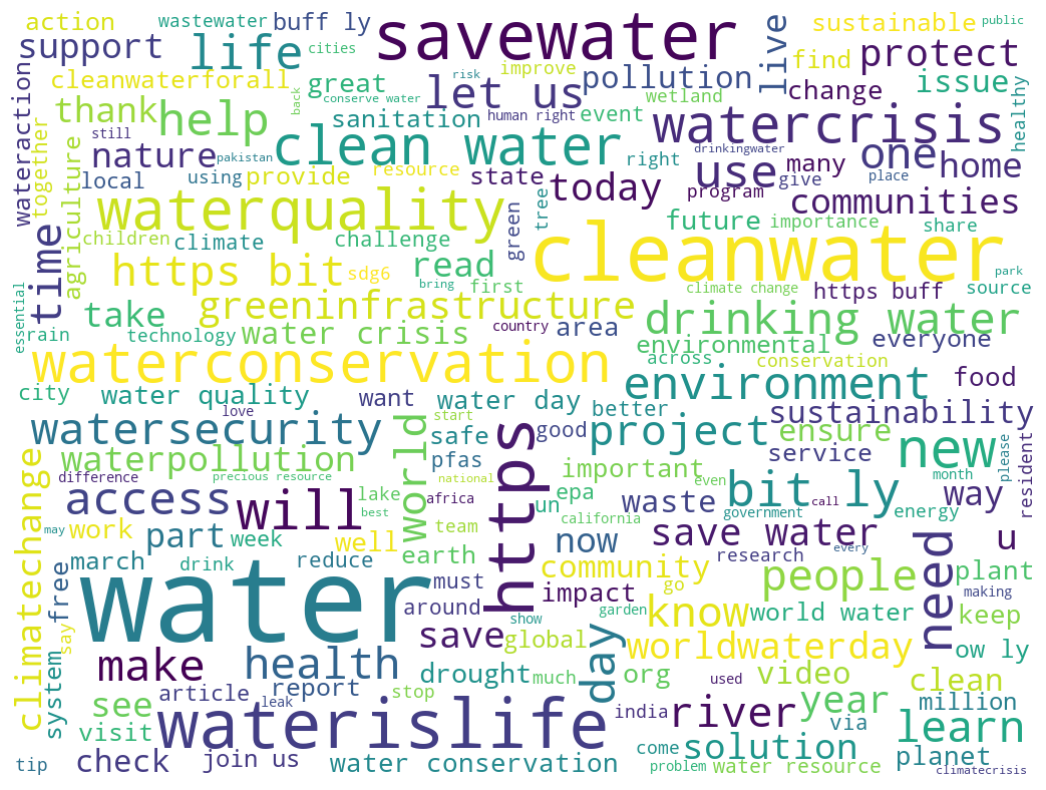

In [73]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_comments = ''.join([comments for comments in data['text']])
word_cloud = WordCloud(background_color = 'white', width=1024, height=768,random_state=21,max_font_size=120).generate(all_comments)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

C:\Users\seda\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


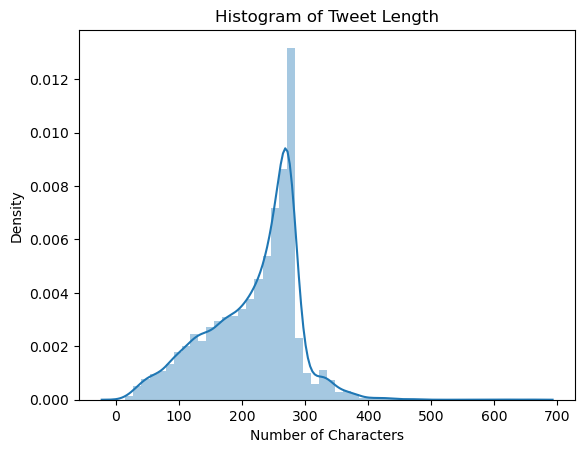

In [74]:
import seaborn as sns

data["tweet_length"] = data["text"].apply(len)
sns.distplot(data["tweet_length"])
plt.title("Histogram of Tweet Length")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

In [75]:
new_data = pd.concat([new_data, data.drop('text', axis=1)], axis=1)
new_data

,text,reply,retweet,like,view,date,word_count,char_count,#tag,@,hastagh,tweet_length
1,water for climate resilience and environment w...,0,0,0,108,1 saat önce,30,278,15,0,"[#vajiramandravi, #unwaterconference, #water, ...",273
2,bbc5live cannot right that more than half bill...,0,0,0,8,1 saat önce,21,121,1,1,[#Savewater],111
3,bbc5live has time scrap the standing charge an...,0,0,0,3,1 saat önce,45,263,1,1,[#Savewater],270
4,watersecurity managing coastal aquifers projec...,0,3,3,108,1 saat önce,38,280,1,3,[#WaterSecurity],279
5,climate change intensifies and rainfall patter...,0,1,1,19,1 saat önce,20,181,3,0,"[#TugwiMukosi, #Zimbabwe, #WaterSecurity]",181
...,...,...,...,...,...,...,...,...,...,...,...,...
6757,this month nature launched new online journal ...,0,1,1,74,26 Oca,29,250,5,1,"[#sanitation, #openscience, #wastewater, #grou...",242
6758,walking urban green spaces better for than wal...,0,1,1,84,26 Oca,19,237,4,0,"[#Walking, #health, #GreenInfrastructure, #gre...",234
6759,these kids came together protest the worlds mo...,0,1,3,70,26 Oca,21,160,1,0,[#WaterIsLife],160
6760,patterned green roofs unique impactful and sur...,0,3,3,185,26 Oca,14,237,3,1,"[#greeninfrastructure, #greenroofs, #stormwate...",237


In [76]:
new_data['total_score'] = new_data['reply'] + new_data['retweet'] + new_data['like']

In [77]:
new_data

,text,reply,retweet,like,view,date,word_count,char_count,#tag,@,hastagh,tweet_length,total_score
1,water for climate resilience and environment w...,0,0,0,108,1 saat önce,30,278,15,0,"[#vajiramandravi, #unwaterconference, #water, ...",273,0
2,bbc5live cannot right that more than half bill...,0,0,0,8,1 saat önce,21,121,1,1,[#Savewater],111,0
3,bbc5live has time scrap the standing charge an...,0,0,0,3,1 saat önce,45,263,1,1,[#Savewater],270,0
4,watersecurity managing coastal aquifers projec...,0,3,3,108,1 saat önce,38,280,1,3,[#WaterSecurity],279,6
5,climate change intensifies and rainfall patter...,0,1,1,19,1 saat önce,20,181,3,0,"[#TugwiMukosi, #Zimbabwe, #WaterSecurity]",181,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,this month nature launched new online journal ...,0,1,1,74,26 Oca,29,250,5,1,"[#sanitation, #openscience, #wastewater, #grou...",242,2
6758,walking urban green spaces better for than wal...,0,1,1,84,26 Oca,19,237,4,0,"[#Walking, #health, #GreenInfrastructure, #gre...",234,2
6759,these kids came together protest the worlds mo...,0,1,3,70,26 Oca,21,160,1,0,[#WaterIsLife],160,4
6760,patterned green roofs unique impactful and sur...,0,3,3,185,26 Oca,14,237,3,1,"[#greeninfrastructure, #greenroofs, #stormwate...",237,6


In [78]:
new_data.to_csv('preprocess/data-preproccessed.csv')